Diagonal-Implizite-Runge_Kutta verfahren

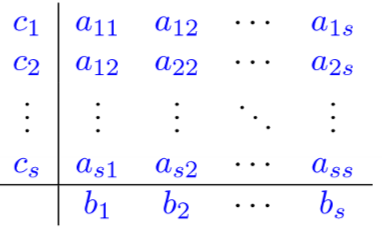

In [7]:
import numpy as np
import matplotlib.pyplot as plt








def RK_implizit(x0, X, N, f, df, tol):
    # x0: Startpunkt
    # X: Endpunkt
    # f: Funktion
    # df: Jacobi Matrix der Funktion f
    # N: Anzahl der Schritte
    # tol: Toleranz

    # Butcher tableau
    c1 = 0.5
    c2 = 0

    a11 =0.5
    a12 = 0
    
    a21 = 0
    a22 = 0

    b1 = 1
    b2 = 0
    

    max_iter=20

    h= (X-x0[0])/N
    N = N+1
    #print( "IMP: Schrittweite: ", h)
    x = np.zeros(N)
    y = np.zeros(N)
    x[0] = x0[0]
    y[0] = x0[1]

    #Anfangspunkt berechnen
    k = f(x[0],y[0])

    for i in range(1,N):
        step = 0
        x[i] = x[i-1] + h
        k1=f(x[i-1] + c1*h, y[i-1] + (h*(k1*a11+a12*k2)))
        k2= f(x[i-1] + c2*h, y[i-1] + (h*(k1*a21+a22*k2)))

        F = np.array([[k1 - f(x[i-1] + c1*h, y[i-1] + (h*(k1*a11+a12*k2)))],[k2-f(x[i-1] + c2*h, y[i-1] + (h*(k1*a21+a22*k2)))]])  

        while np.abs(r) > tol and step < max_iter:
            j = df(x[i-1] + h, y[i-1] + (h*k))


            delta_k = -r / (1 - (h*j))
            k = k + delta_k
            r = f(x[i-1] + c1*h, y[i-1] + (h*(k1*a11+a12*k2)))
            step += 1

        y[i] = y[i-1] + (h*k)

    return x,y







In [ ]:
def model2(x,y):
    return -4*y

def model2_df(x,y):
    return -4

AWP